In [1]:
import matplotlib.pyplot as plt
import numpy as np

def pad_accuracies(accuracies):
    max_len = max(len(task) for task in accuracies)
    padded_accuracies = [task + [None] * (max_len - len(task)) for task in accuracies]
    return np.array(padded_accuracies, dtype=np.float32)

def plot_task_accuracies_roundwise(sgd_accuracies, bgd_accuracies):
 
    sgd_accuracies = pad_accuracies(sgd_accuracies)
    bgd_accuracies = pad_accuracies(bgd_accuracies)
    
    plt.figure(figsize=(10, 6))

    colors = plt.cm.Set1(np.linspace(0, 1, sgd_accuracies.shape[1]))
    for i in range(0, sgd_accuracies.shape[1]): # 0 - 9
        # print(f'sgd_accuracies : {sgd_accuracies[:, i]}')
        task_accuracies_over_rounds = sgd_accuracies[:, i]
        # print(task_accuracies_over_rounds)
        plt.plot(range(1, sgd_accuracies.shape[0] + 1), task_accuracies_over_rounds, marker='o', linestyle='--', color=colors[i], label=f'CFL_SGD Task {i+1}', linewidth=2.5)

   
    for i in range(0, bgd_accuracies.shape[1]):
        #print(f'bgd_accuracies : {bgd_accuracies[:, i]}')
        plt.plot(range(1, bgd_accuracies.shape[0] + 1), bgd_accuracies[:, i], marker='s', color=colors[i], label=f'CFL_BGD Task {i+1}', linewidth=2.5)
    
    plt.title(f'Task wise Accuracies', fontweight='bold')
    plt.xlabel('Rounds', fontsize=14, fontweight='bold')
    plt.ylabel('Accuracy', fontsize=14, fontweight='bold')

    plt.xticks(fontweight='bold')
    plt.yticks(fontweight='bold')
    plt.legend(fontsize=16)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [2]:

def plot_average_accuracies_over_rounds(sgd_accuracies, bgd_accuracies):
    plt.figure(figsize=(10, 6))
    tasks = range(0, len(sgd_accuracies))
    
    sgd_means = [np.mean(np.array(task_accs)) for task_accs in sgd_accuracies]
    print(f"sgd_means: {sgd_means}")
    plt.plot(tasks, sgd_means, marker='o', label='CFL_SGD',linestyle='--', linewidth=2.5)
    
    bgd_means = [np.mean(np.array(task_accs)) for task_accs in bgd_accuracies]
    print(f"bgd_means: {bgd_means}")
    plt.plot(tasks, bgd_means, marker='s', label='CFL_BGD', linewidth=2.5)
    
    plt.xlabel('Task ID', fontsize=14, fontweight='bold')
    plt.ylabel('Accuracy', fontsize=14, fontweight='bold')
    # plt.title(f'Average Accuracies per round for SGD and BGD - FedAvg BGD ')
    plt.title(f'Average Accuracy across tasks', fontweight='bold')
    plt.xticks(range(max(len(sgd_accuracies), len(bgd_accuracies))), [f'{i+1}' for i in range(max(len(sgd_accuracies), len(bgd_accuracies)))], fontweight='bold')
    plt.yticks(fontweight='bold')
    plt.legend(fontsize=16)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [3]:
def calculate_forgetting(sgd_task_accuracies, bgd_task_accuracies):
    s = len(sgd_task_accuracies)

    print("sgd_avg_acc_after_last_task", round(np.mean(sgd_task_accuracies[s-1]), 2))
    print("bgd_avg_acc_after_last_task", round(np.mean(bgd_task_accuracies[s-1]), 2))

    sgd_forgetting = []
    for i in range(s-1):
        sgd_forgetting.append(sgd_task_accuracies[i][i]-sgd_task_accuracies[s-1][i])

    bgd_forgetting = []
    for i in range(s-1):
        bgd_forgetting.append(bgd_task_accuracies[i][i]-bgd_task_accuracies[s-1][i])

    return round(np.mean(sgd_forgetting),2), round(np.mean(bgd_forgetting), 2)

# **P MNIST**

## **IID**

sgd_means: [96.32, 94.75, 90.79333333333334, 79.815, 76.054]
bgd_means: [96.25, 93.58, 90.94666666666666, 84.5625, 82.316]


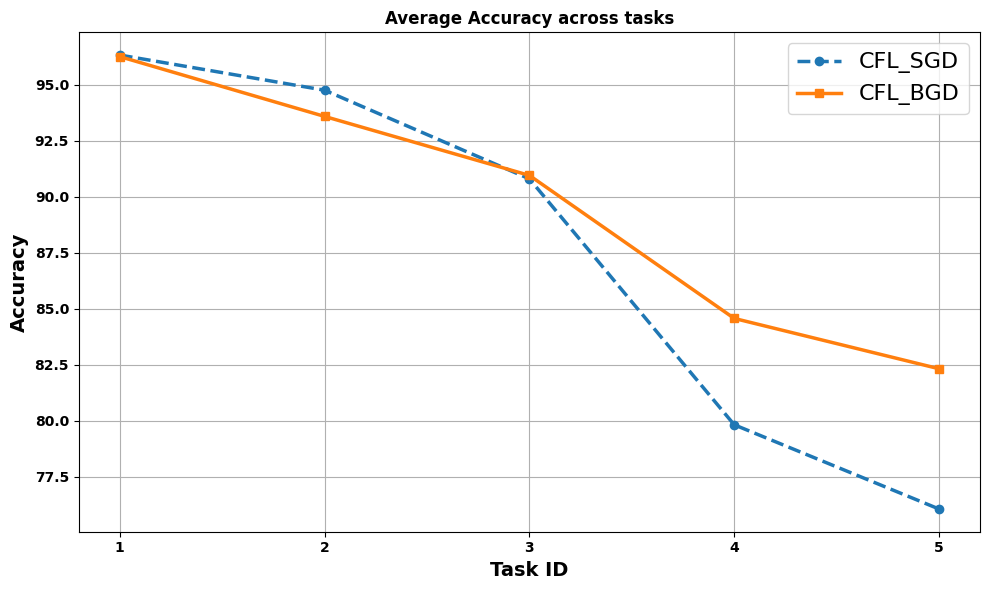

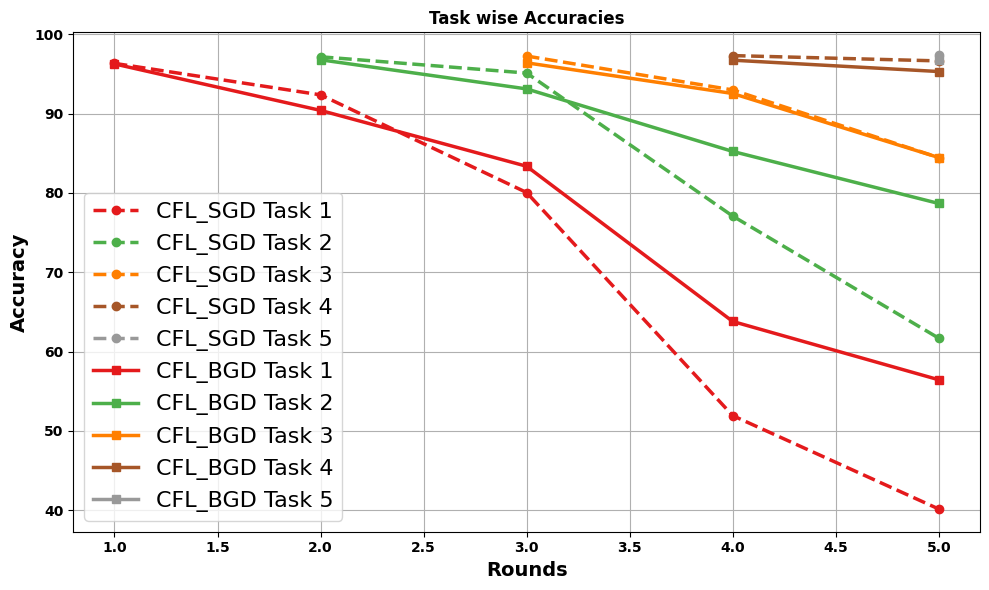

sgd_avg_acc_after_last_task 76.05
bgd_avg_acc_after_last_task 82.32


(26.28, 17.82)

In [4]:
new_agg_tasks_5_bgd_sgd_iid_perm_mnist_alpha_100000 = {'bgd' : [[96.25], [90.39, 96.77], [83.35, 93.1, 96.39], [63.79, 85.22, 92.52, 96.72], [56.44, 78.66, 84.45, 95.29, 96.74]],
                                                       'sgd' :  [[96.32], [92.35, 97.15], [80.04, 95.1, 97.24], [51.92, 77.07, 92.97, 97.3], [40.15, 61.68, 84.44, 96.63, 97.37]]}
plot_average_accuracies_over_rounds(new_agg_tasks_5_bgd_sgd_iid_perm_mnist_alpha_100000['sgd'], new_agg_tasks_5_bgd_sgd_iid_perm_mnist_alpha_100000['bgd'])
plot_task_accuracies_roundwise(new_agg_tasks_5_bgd_sgd_iid_perm_mnist_alpha_100000['sgd'], new_agg_tasks_5_bgd_sgd_iid_perm_mnist_alpha_100000['bgd'])
sgd_avg_forgetting, bgd_avg_forgetting = calculate_forgetting(new_agg_tasks_5_bgd_sgd_iid_perm_mnist_alpha_100000['sgd'], new_agg_tasks_5_bgd_sgd_iid_perm_mnist_alpha_100000['bgd'])
sgd_avg_forgetting, bgd_avg_forgetting  

## IID New

sgd_means: [96.62, 77.37, 64.13333333333333, 51.75, 51.906000000000006]
bgd_means: [96.02, 93.645, 92.41666666666667, 88.5925, 85.832]


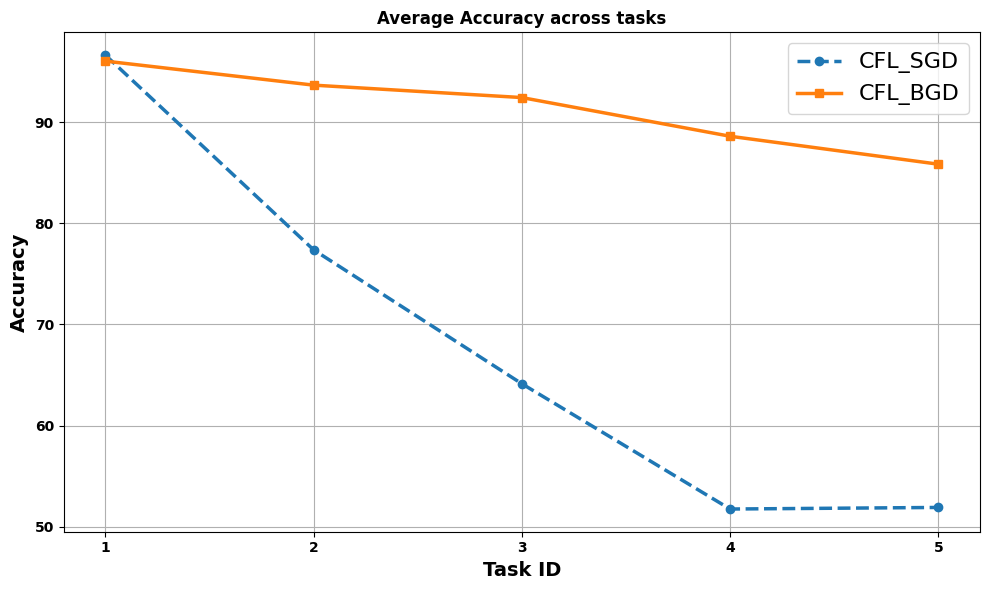

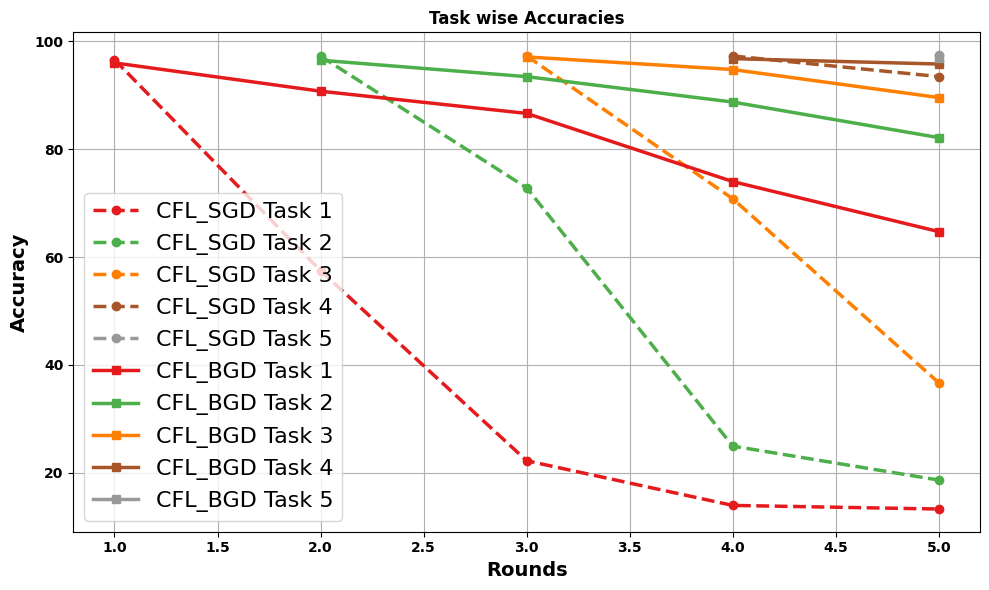

sgd_avg_acc_after_last_task 51.91
bgd_avg_acc_after_last_task 85.83


(56.62, 13.55)

In [61]:
new_agg_tasks_5_bgd_sgd_iid_perm_mnist_alpha_100000 = {'bgd' : [[96.02], [90.77, 96.52], [86.65, 93.47, 97.13], [74.01, 88.76, 94.79, 96.81], [64.72, 82.16, 89.59, 95.81, 96.88]],
                                                       'sgd' :  [[96.62], [57.47, 97.27], [22.22, 72.86, 97.32], [13.93, 24.94, 70.82, 97.31], [13.26, 18.63, 36.68, 93.48, 97.48]]}
plot_average_accuracies_over_rounds(new_agg_tasks_5_bgd_sgd_iid_perm_mnist_alpha_100000['sgd'], new_agg_tasks_5_bgd_sgd_iid_perm_mnist_alpha_100000['bgd'])
plot_task_accuracies_roundwise(new_agg_tasks_5_bgd_sgd_iid_perm_mnist_alpha_100000['sgd'], new_agg_tasks_5_bgd_sgd_iid_perm_mnist_alpha_100000['bgd'])
sgd_avg_forgetting, bgd_avg_forgetting = calculate_forgetting(new_agg_tasks_5_bgd_sgd_iid_perm_mnist_alpha_100000['sgd'], new_agg_tasks_5_bgd_sgd_iid_perm_mnist_alpha_100000['bgd'])
sgd_avg_forgetting, bgd_avg_forgetting  

## **Non-IID alpha=0.1**

sgd_means: [62.02, 53.17, 51.73333333333333, 42.900000000000006, 38.35]
bgd_means: [78.47, 75.69, 77.92666666666666, 72.56, 66.236]


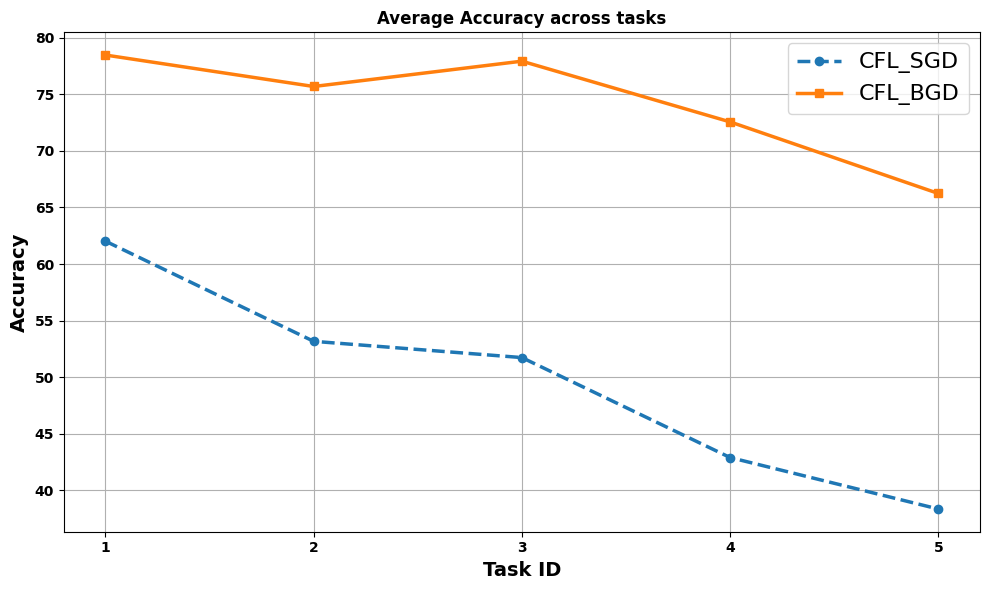

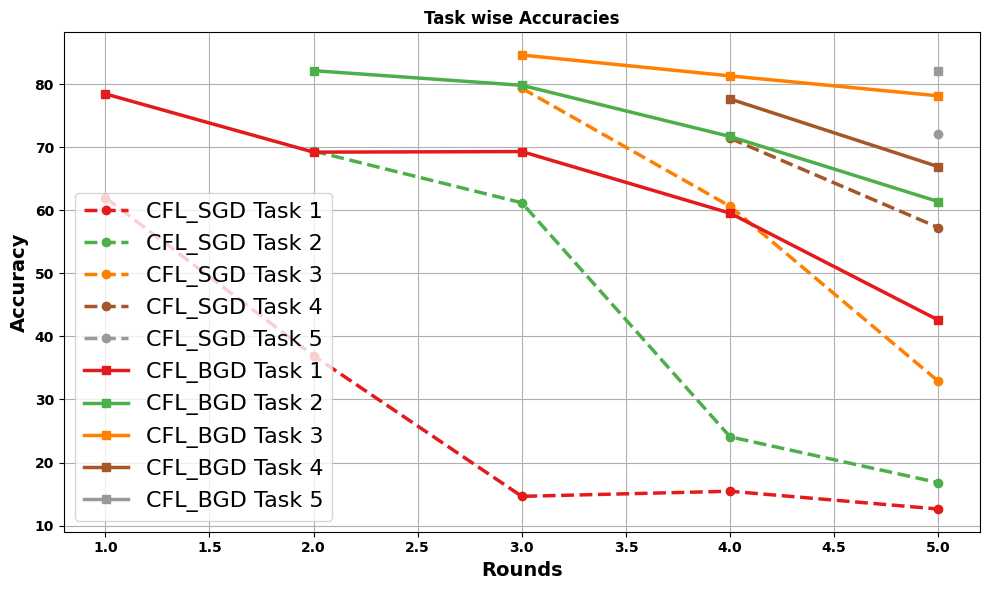

sgd_avg_acc_after_last_task 38.35
bgd_avg_acc_after_last_task 66.24


(40.65, 18.46)

In [62]:
new_agg_tasks_5_bgd_sgd_iid_perm_mnist_alpha_0_1 = {'bgd' : [[78.47], [69.23, 82.15], [69.32, 79.83, 84.63], [59.55, 71.71, 81.32, 77.66], [42.59, 61.38, 78.16, 66.92, 82.13]] ,
                               'sgd' : [[62.02], [36.94, 69.4], [14.64, 61.2, 79.36], [15.45, 24.08, 60.64, 71.43], [12.63, 16.81, 32.89, 57.27, 72.15]]}
plot_average_accuracies_over_rounds(new_agg_tasks_5_bgd_sgd_iid_perm_mnist_alpha_0_1['sgd'], new_agg_tasks_5_bgd_sgd_iid_perm_mnist_alpha_0_1['bgd'])
plot_task_accuracies_roundwise(new_agg_tasks_5_bgd_sgd_iid_perm_mnist_alpha_0_1['sgd'], new_agg_tasks_5_bgd_sgd_iid_perm_mnist_alpha_0_1['bgd'])
sgd_avg_forgetting, bgd_avg_forgetting = calculate_forgetting(new_agg_tasks_5_bgd_sgd_iid_perm_mnist_alpha_0_1['sgd'], new_agg_tasks_5_bgd_sgd_iid_perm_mnist_alpha_0_1['bgd'])
sgd_avg_forgetting, bgd_avg_forgetting  


## **Non-IID alpha=0.01**

sgd_means: [29.45, 34.765, 31.74, 18.46, 22.407999999999998]
bgd_means: [30.12, 40.305, 38.5, 35.6325, 36.720000000000006]


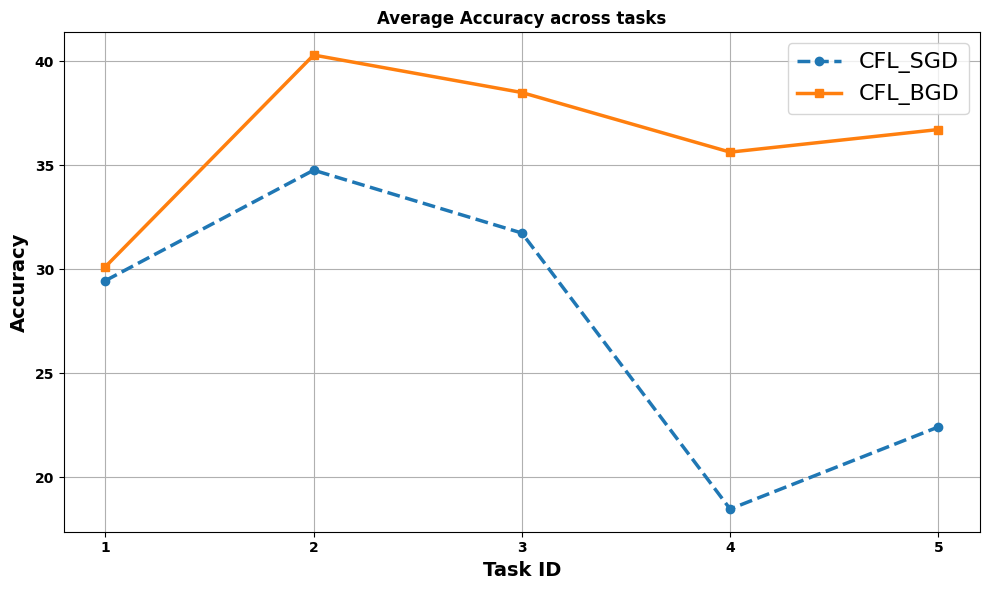

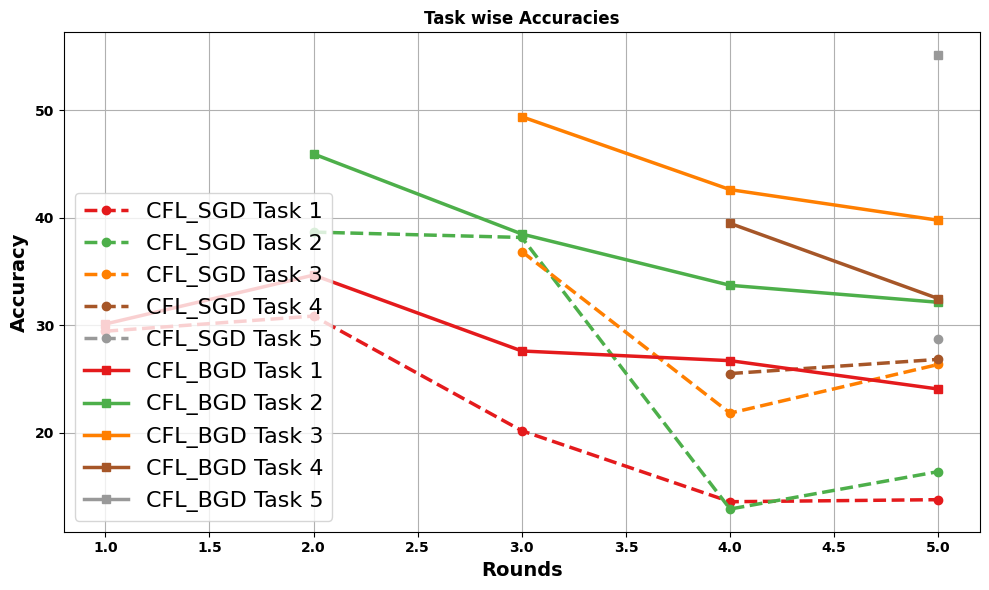

sgd_avg_acc_after_last_task 22.41
bgd_avg_acc_after_last_task 36.72


(11.78, 9.12)

In [63]:
#### Non-IID || Rounds-5 || Tasks-5
new_agg_tasks_5_bgd_sgd_iid_perm_mnist_alpha_0_01 = {'bgd' : [[30.12], [34.67, 45.94], [27.61, 38.49, 49.4], [26.71, 33.72, 42.62, 39.48], [24.07, 32.14, 39.77, 32.48, 55.14]] ,
                                               'sgd' : [[29.45], [30.86, 38.67], [20.19, 38.17, 36.86], [13.59, 12.91, 21.83, 25.51], [13.78, 16.39, 26.36, 26.83, 28.68]] }
plot_average_accuracies_over_rounds(new_agg_tasks_5_bgd_sgd_iid_perm_mnist_alpha_0_01['sgd'], new_agg_tasks_5_bgd_sgd_iid_perm_mnist_alpha_0_01['bgd'])
plot_task_accuracies_roundwise(new_agg_tasks_5_bgd_sgd_iid_perm_mnist_alpha_0_01['sgd'], new_agg_tasks_5_bgd_sgd_iid_perm_mnist_alpha_0_01['bgd'])
sgd_avg_forgetting, bgd_avg_forgetting = calculate_forgetting(new_agg_tasks_5_bgd_sgd_iid_perm_mnist_alpha_0_01['sgd'], new_agg_tasks_5_bgd_sgd_iid_perm_mnist_alpha_0_01['bgd'])
sgd_avg_forgetting, bgd_avg_forgetting  

# **Split MNIST**

## **IID**

sgd_means: [99.527, 88.137, 86.74333333333334, 60.5215, 63.48819999999999]
bgd_means: [99.669, 89.137, 85.72366666666666, 65.209, 69.78420000000001]


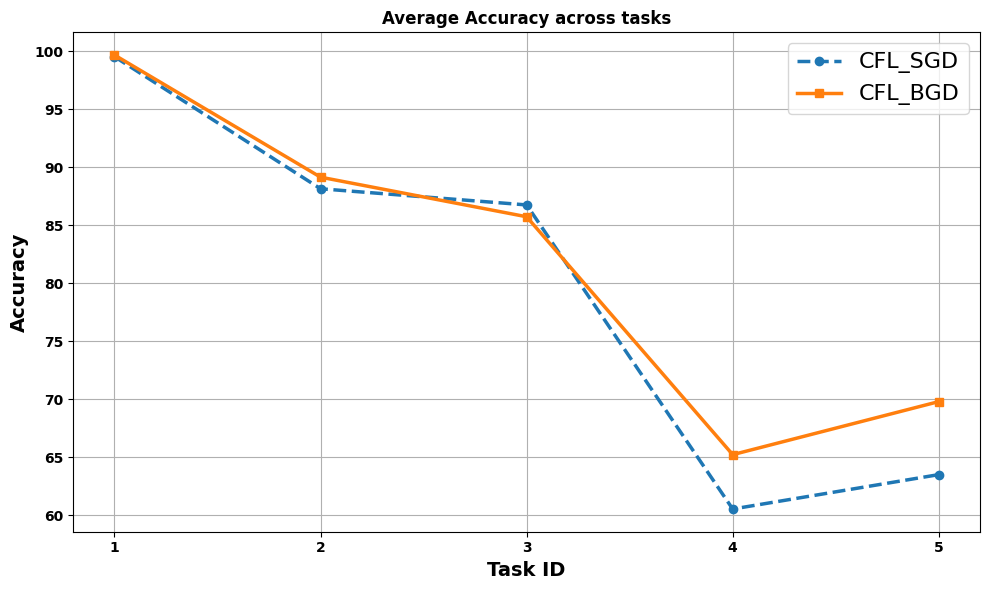

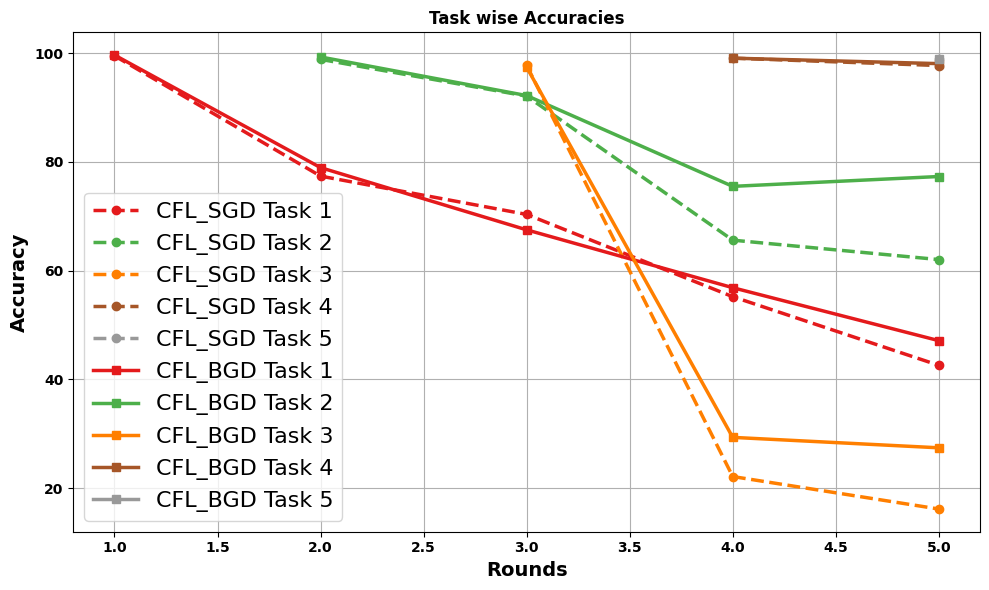

sgd_avg_acc_after_last_task 63.49
bgd_avg_acc_after_last_task 69.78


(44.18, 36.38)

In [64]:
new_agg_tasks_5_bgd_sgd_iid_split_mnist_alpha_100000 = {'bgd' : [[99.669], [78.96, 99.314], [67.518, 92.214, 97.439], [56.879, 75.514, 29.349, 99.094], [47.139, 77.326, 27.428, 98.087, 98.941]],
                                               'sgd' : [[99.527], [77.4, 98.874], [70.355, 92.116, 97.759], [55.225, 65.622, 22.145, 99.094], [42.6, 62.047, 16.169, 97.734, 98.891]]}
plot_average_accuracies_over_rounds(new_agg_tasks_5_bgd_sgd_iid_split_mnist_alpha_100000['sgd'], new_agg_tasks_5_bgd_sgd_iid_split_mnist_alpha_100000['bgd'])
plot_task_accuracies_roundwise(new_agg_tasks_5_bgd_sgd_iid_split_mnist_alpha_100000['sgd'], new_agg_tasks_5_bgd_sgd_iid_split_mnist_alpha_100000['bgd'])
sgd_avg_forgetting, bgd_avg_forgetting = calculate_forgetting(new_agg_tasks_5_bgd_sgd_iid_split_mnist_alpha_100000['sgd'], new_agg_tasks_5_bgd_sgd_iid_split_mnist_alpha_100000['bgd'])
sgd_avg_forgetting, bgd_avg_forgetting

# **IID NEW**

sgd_means: [99.574, 81.5885, 83.17866666666667, 56.646, 60.1202]
bgd_means: [99.811, 88.4295, 88.48033333333335, 61.414750000000005, 67.137]


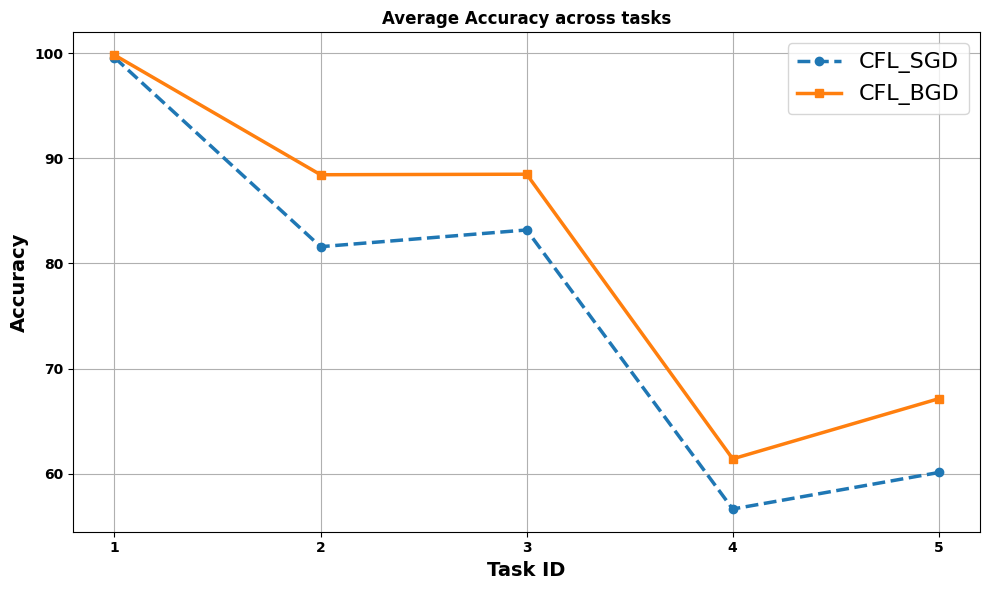

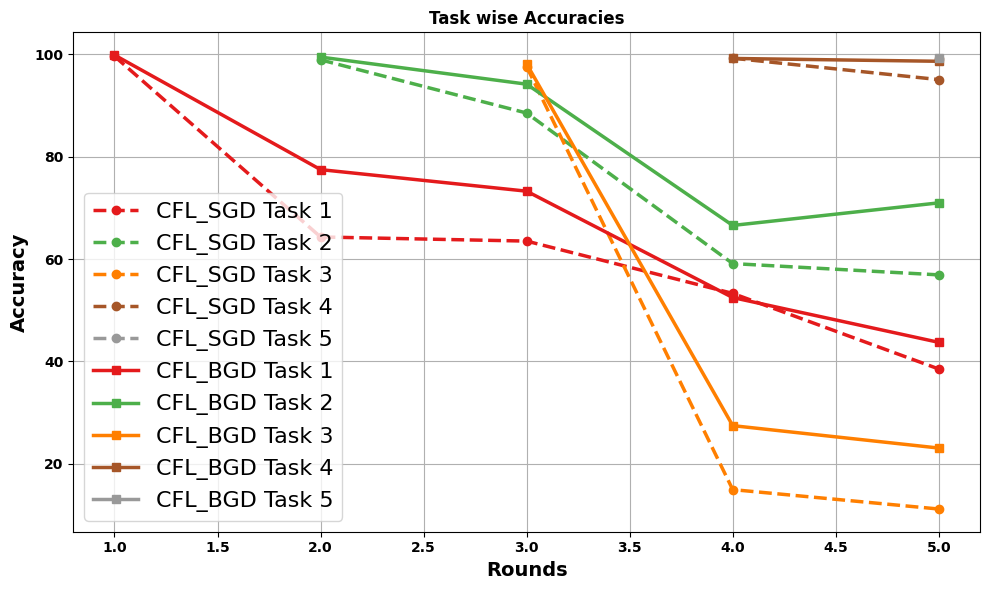

sgd_avg_acc_after_last_task 60.12
bgd_avg_acc_after_last_task 67.14


(48.38, 40.01)

In [65]:
new_agg_tasks_5_bgd_sgd_iid_split_mnist_alpha_100000 = {'bgd' :[[99.811], [77.447, 99.412], [73.239, 94.123, 98.079], [52.482, 66.552, 27.481, 99.144], [43.735, 70.96, 23.106, 98.59, 99.294]],
                                               'sgd' :  [[99.574], [64.303, 98.874], [63.499, 88.492, 97.545], [53.286, 59.109, 14.995, 99.194], [38.534, 56.905, 11.206, 95.015, 98.941]]}
plot_average_accuracies_over_rounds(new_agg_tasks_5_bgd_sgd_iid_split_mnist_alpha_100000['sgd'], new_agg_tasks_5_bgd_sgd_iid_split_mnist_alpha_100000['bgd'])
plot_task_accuracies_roundwise(new_agg_tasks_5_bgd_sgd_iid_split_mnist_alpha_100000['sgd'], new_agg_tasks_5_bgd_sgd_iid_split_mnist_alpha_100000['bgd'])
sgd_avg_forgetting, bgd_avg_forgetting = calculate_forgetting(new_agg_tasks_5_bgd_sgd_iid_split_mnist_alpha_100000['sgd'], new_agg_tasks_5_bgd_sgd_iid_split_mnist_alpha_100000['bgd'])
sgd_avg_forgetting, bgd_avg_forgetting

## **Non-IID alpha=0.1**

sgd_means: [96.028, 85.32249999999999, 85.16933333333334, 57.115750000000006, 60.898199999999996]
bgd_means: [99.574, 93.936, 89.89633333333332, 62.946, 69.2706]


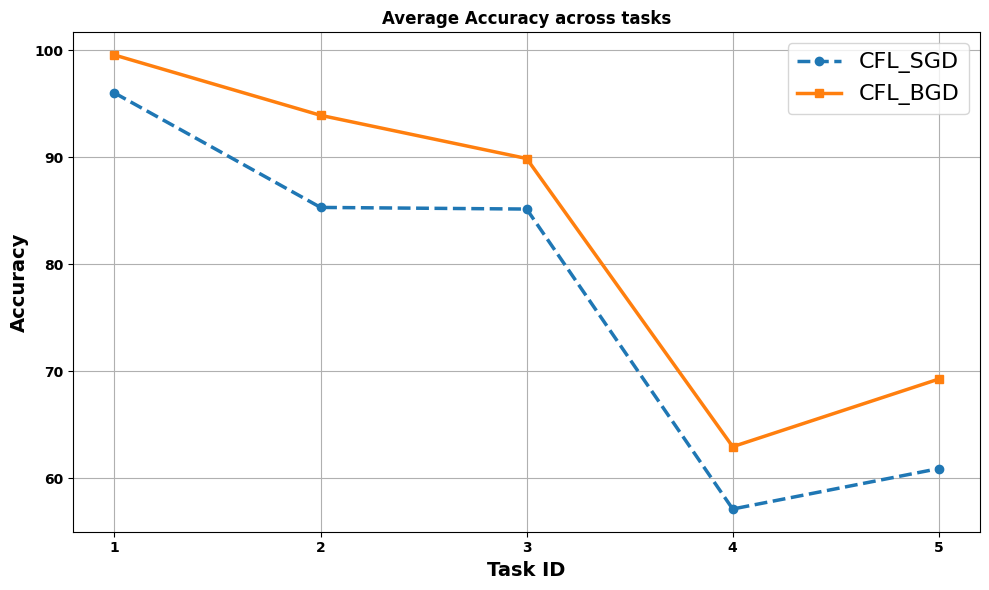

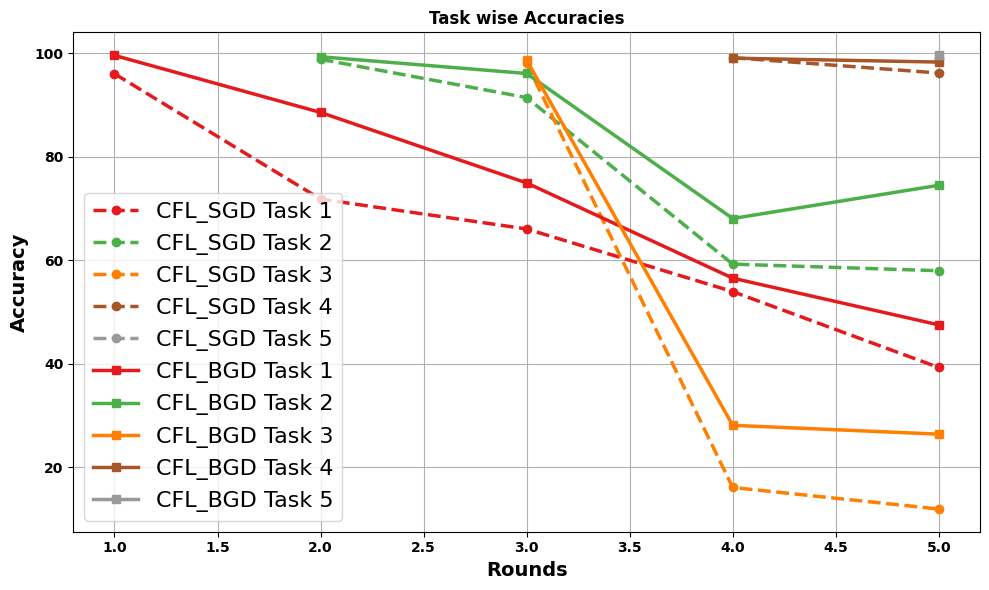

sgd_avg_acc_after_last_task 60.9
bgd_avg_acc_after_last_task 69.27


(46.66, 37.47)

In [66]:
new_agg_tasks_5_bgd_sgd_iid_split_mnist_alpha_0_1 = {'bgd' : [[99.574], [88.558, 99.314], [74.941, 96.082, 98.666], [56.548, 68.071, 28.122, 99.043], [47.518, 74.486, 26.414, 98.288, 99.647]],
                                               'sgd' : [[96.028], [71.82, 98.825], [66.052, 91.43, 98.026], [53.948, 59.256, 16.115, 99.144], [39.291, 57.982, 11.953, 96.173, 99.092]]}
plot_average_accuracies_over_rounds(new_agg_tasks_5_bgd_sgd_iid_split_mnist_alpha_0_1['sgd'], new_agg_tasks_5_bgd_sgd_iid_split_mnist_alpha_0_1['bgd'])
plot_task_accuracies_roundwise(new_agg_tasks_5_bgd_sgd_iid_split_mnist_alpha_0_1['sgd'], new_agg_tasks_5_bgd_sgd_iid_split_mnist_alpha_0_1['bgd'])
sgd_avg_forgetting, bgd_avg_forgetting = calculate_forgetting(new_agg_tasks_5_bgd_sgd_iid_split_mnist_alpha_0_1['sgd'], new_agg_tasks_5_bgd_sgd_iid_split_mnist_alpha_0_1['bgd'])
sgd_avg_forgetting, bgd_avg_forgetting

## **Non-IID alpha=0.01**

sgd_means: [96.548, 85.7695, 84.507, 56.591499999999996, 60.94960000000001]
bgd_means: [99.622, 92.72749999999999, 89.99566666666665, 62.348, 68.90520000000001]


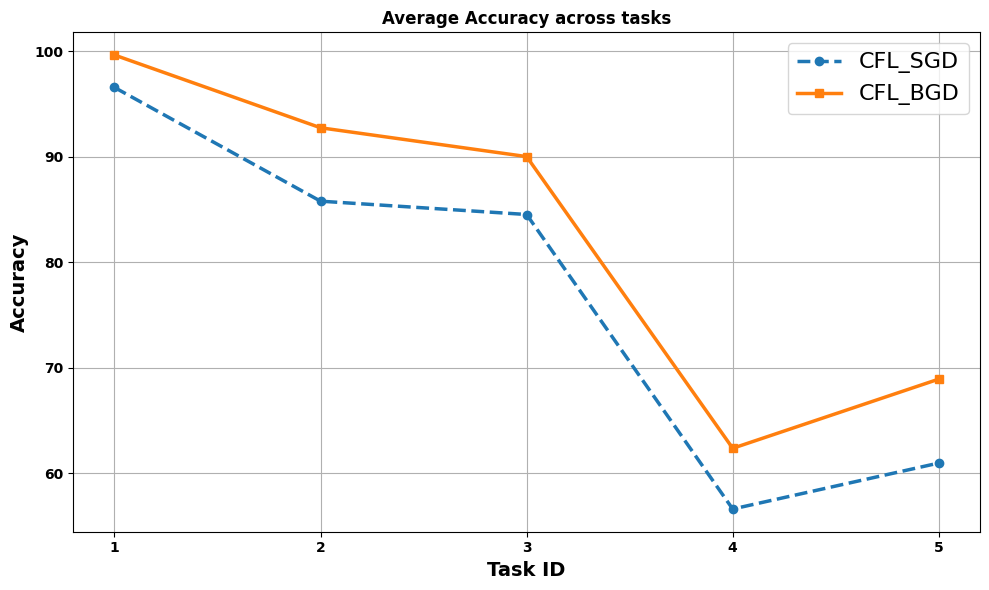

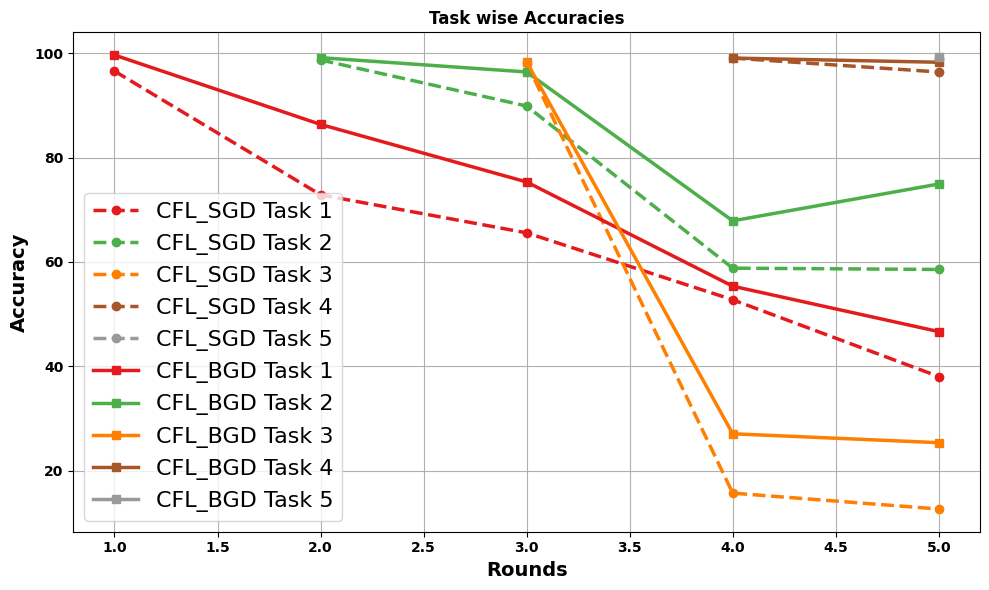

sgd_avg_acc_after_last_task 60.95
bgd_avg_acc_after_last_task 68.91


(46.66, 37.71)

In [67]:
new_agg_tasks_5_bgd_sgd_iid_split_mnist_alpha_0_01 = {'bgd' : [[99.622], [86.336, 99.119], [75.319, 96.376, 98.292], [55.366, 67.875, 27.108, 99.043], [46.667, 74.927, 25.4, 98.238, 99.294]] ,
                                               'sgd' : [[96.548], [72.861, 98.678], [65.579, 89.863, 98.079], [52.766, 58.815, 15.742, 99.043], [38.061, 58.57, 12.7, 96.375, 99.042]]}
plot_average_accuracies_over_rounds(new_agg_tasks_5_bgd_sgd_iid_split_mnist_alpha_0_01['sgd'], new_agg_tasks_5_bgd_sgd_iid_split_mnist_alpha_0_01['bgd'])
plot_task_accuracies_roundwise(new_agg_tasks_5_bgd_sgd_iid_split_mnist_alpha_0_01['sgd'], new_agg_tasks_5_bgd_sgd_iid_split_mnist_alpha_0_01['bgd'])
sgd_avg_forgetting, bgd_avg_forgetting = calculate_forgetting(new_agg_tasks_5_bgd_sgd_iid_split_mnist_alpha_0_01['sgd'], new_agg_tasks_5_bgd_sgd_iid_split_mnist_alpha_0_01['bgd'])
sgd_avg_forgetting, bgd_avg_forgetting